In [1]:
%matplotlib inline

In [2]:
import random
import sys
import matplotlib.pyplot as plt
import numpy
from scipy.spatial import distance

In [3]:
# Create 100 random points with values from (0,0) to (99,99)

random.seed(5)
x = [random.randint(0,99) for p in range(0,99)]
y = [random.randint(0,99) for p in range(0,99)]

points = zip(x,y)

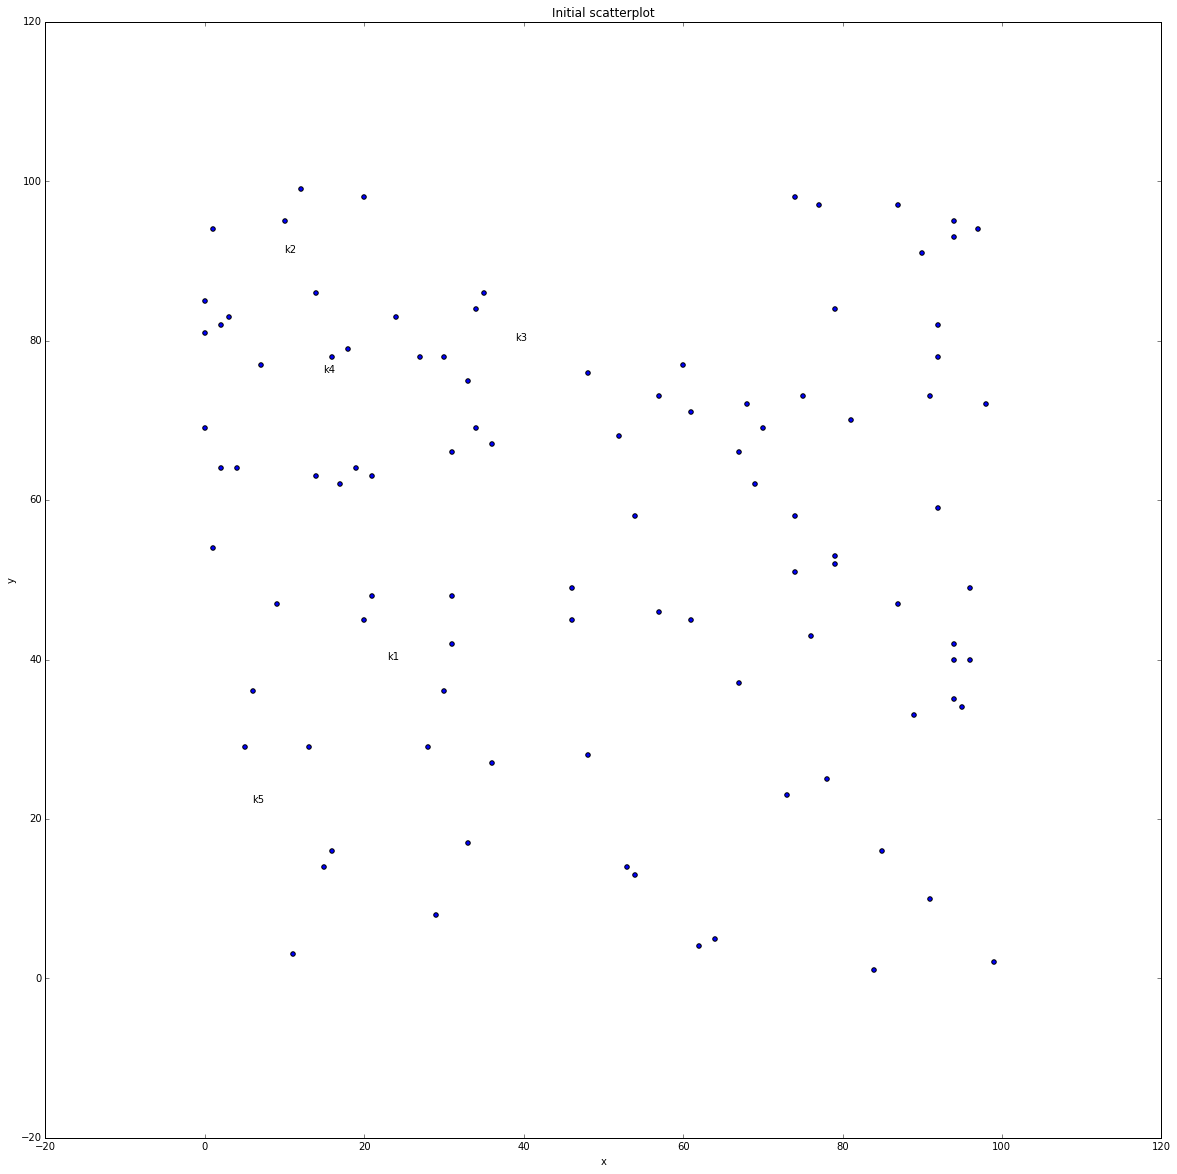

In [4]:
# Scatterplot of points and initial(random) means

random.seed(4)
mean_x = [random.randint(0,99) for p in range(0,5)]
mean_y = [random.randint(0,99) for p in range(0,5)]
means = ['k1', 'k2', 'k3', 'k4', 'k5']

fig, ax = plt.subplots(figsize=(20,20))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Initial scatterplot')
ax.scatter(x,y)

for j, txt in enumerate(means):
    ax.annotate(txt, (mean_x[j], mean_y[j]))

In [5]:
# k-means clustering algorithm
# returns a list of length k of means that will minimize the total distance from each mean to all the points

def kmeans(x_vals, y_vals, k):
    # k random points in 2D
    random.seed(4)
    means_x = [random.randint(0,99) for p in range(0,k)] 
    means_y = [random.randint(0,99) for p in range(0,k)]
    
    means = zip(means_x, means_y)
    print means
    xs= x_vals # easier to reference names
    ys = y_vals
    
    new_means = None
    
    while means != new_means:  # end condition: when the k-means converge
    
        if new_means != None:
            means = new_means
            
        clusters = dict()

        for x,y in zip(xs,ys):
            clusterPoint = findCluster(x, y, means) # returns which cluster(mx,my) the current x,y belongs to
            dataPoint = x,y
            clusters.setdefault(clusterPoint, []).append(dataPoint) # Adding point to cluster

        # Gather new cluster points
        
        new_cluster = []
        for key, value in clusters.iteritems():
            # Finding the mean of each cluster
            new_cluster_x = numpy.mean([f for f,s in value]) 
            new_cluster_y = numpy.mean([s for f,s in value])
            
            new_cluster_point = new_cluster_x, new_cluster_y
            new_cluster.append(new_cluster_point)

        new_mean_x = [f for f,s in new_cluster] # extracting the 1st element in tuple
        new_mean_y = [s for f,s in new_cluster]

        new_means = zip(new_mean_x,new_mean_y)
    
    return means

In [6]:
# Given a point and the list of current means, this function will return
# the mean that the point belongs to

def findCluster(x, y, means):
    smallest = sys.maxint
    point = (0,0)
    for mx,my in means:
        dst = distance.euclidean((x,y), (mx,my)) # calculates distance between a point and the current "mean"
        
        if dst < smallest:
            smallest = dst
            point = (mx,my)
            
    return point

[(23, 40), (10, 91), (39, 80), (15, 76), (6, 22)]


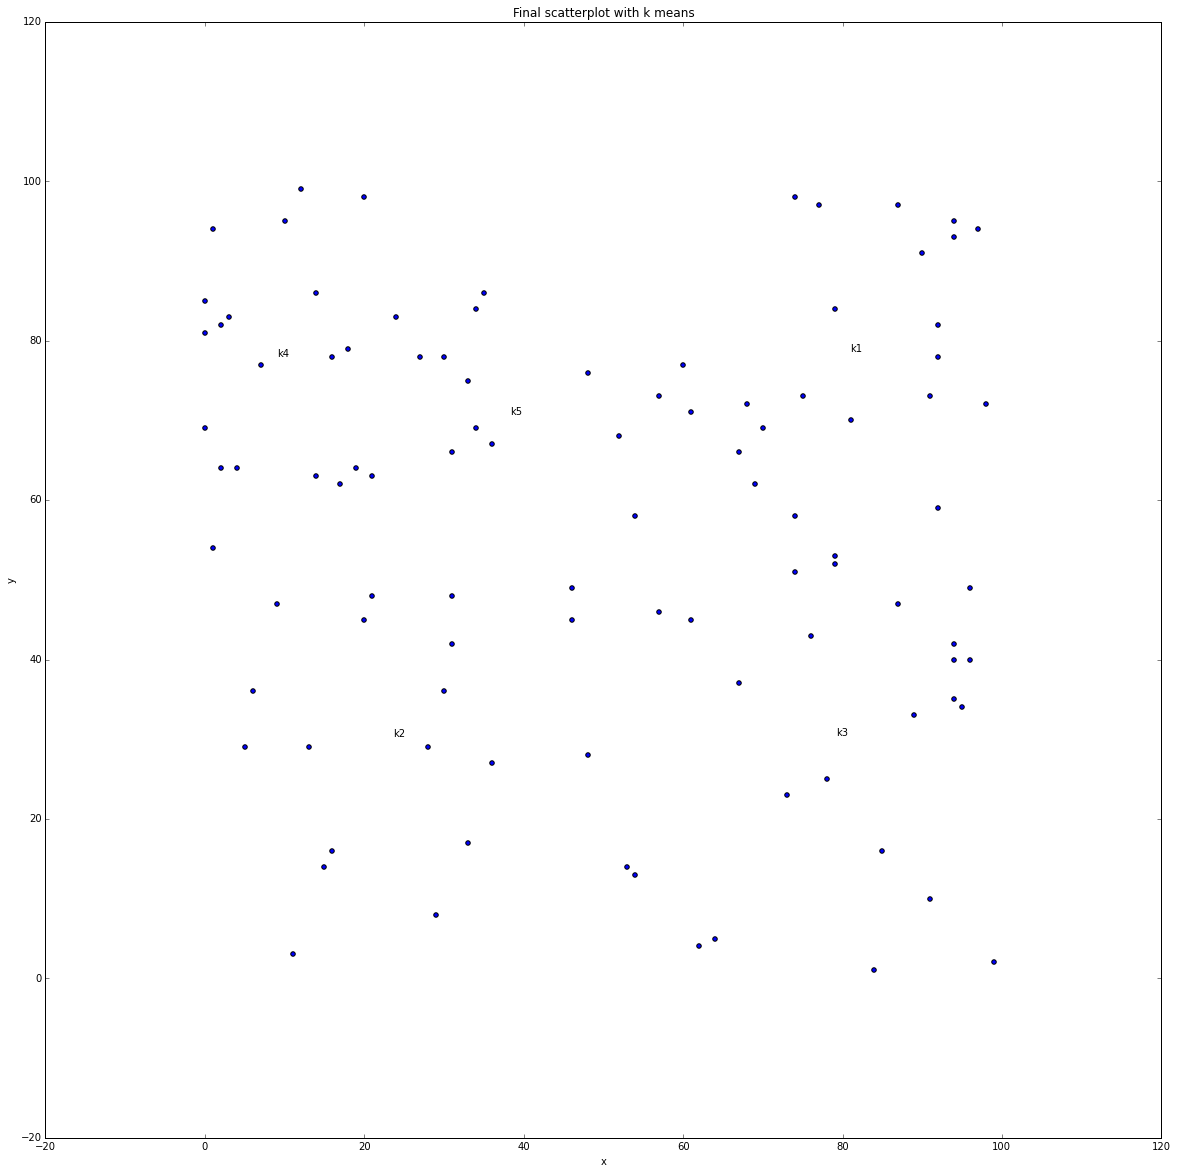

In [7]:
# An updated scatterplot with the k means

means = ['k1', 'k2', 'k3', 'k4', 'k5']
kmeans = kmeans(x,y,5)
fig, ax = plt.subplots(figsize=(20,20))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Final scatterplot with k means')
ax.scatter(x,y)

for j, txt in enumerate(means):
    ax.annotate(txt, kmeans[j])